ปฏิบัติการครั้งที่ 1 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ **เมื่อเสร็จแล้วให้ทำการ share** จากนั้นส่ง link มาใน mango canvas

ในขั้นตอนแรก ขอให้ download ไฟล์ที่

http://donlapark.pages.dev/229351/data/housing.csv

In [17]:
import pandas as pd #dataframes
import numpy as np #matrices
import matplotlib.pyplot as plt #for plotting

%matplotlib inline

!wget http://donlapark.pages.dev/229351/data/housing.csv

housing = pd.read_csv("housing.csv")

housing.head(10)

--2025-06-30 14:56:39--  http://donlapark.pages.dev/229351/data/housing.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://donlapark.pages.dev/229351/data/housing.csv [following]
--2025-06-30 14:56:39--  https://donlapark.pages.dev/229351/data/housing.csv
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/csv]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.05s   

2025-06-30 14:56:39 (26.2 MB/s) - ‘housing.csv’ saved [1423529/1423529]



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## Basic data exploration

In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Which variable has missing data?

In [4]:
housing = housing.dropna()

NameError: name 'housing' is not defined

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exercise 1

1. Download ไฟล์ข้อมูลที่
  http://donlapark.pages.dev/229351/data/Advertising.csv
  ซึ่งเป็นข้อมูลของผลการขายสินค้าอย่างหนึ่ง (Sales) กับการโฆษณาผ่านทาง TV, Radio, Newspaper
2. สร้าง dataframe ชื่อว่า **Ads** โดยใช้ข้อมูลชุดนี้
3. ดูข้อมูล 5 แถวแรกของ `Ads`
4. ตรวจสอบว่ามีข้อมูลที่หายไปหรือไม่
5. แสดงค่าสถิติพรรณนา (Descriptive statistics) ของตัวแปรต่างๆ

In [3]:
# code here
import pandas as pd #dataframes
import numpy as np #matrices
import matplotlib.pyplot as plt #for plotting

%matplotlib inline

!wget  http://donlapark.pages.dev/229351/data/Advertising.csv

Ads = pd.read_csv("Advertising.csv")

Ads.head(10)

--2025-06-30 14:47:49--  http://donlapark.pages.dev/229351/data/Advertising.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://donlapark.pages.dev/229351/data/Advertising.csv [following]
--2025-06-30 14:47:49--  https://donlapark.pages.dev/229351/data/Advertising.csv
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3870 (3.8K) [text/csv]
Saving to: ‘Advertising.csv.1’

Advertising.csv.1   100%[===================>]   3.78K  --.-KB/s    in 0s      

2025-06-30 14:47:50 (73.8 MB/s) - ‘Advertising.csv.1’ saved [3870/3870]



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


Your answers here:

In [ ]:
Ads.iloc[0:5,:]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
Ads.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
Ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Calling, indexing & modifying dataframes

In [ ]:
# calling a column

Ads['TV']

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


`ocean_proximity` is categorical. Let's count its values.

In [ ]:
Ads["TV"].value_counts()

,count
TV,
17.2,2
199.8,2
240.1,2
237.4,2
177.0,2
...,...
149.7,1
38.2,1
94.2,1


## Basic statistics of a variable

In [ ]:
print("Mean: ",Ads["total_rooms"].mean())
print("Standard deviation: ",Ads["total_rooms"].std())
print("Maximum: ",Ads["total_rooms"].max())
print("Minimum: ",Ads["total_rooms"].min())

In [ ]:
Ads[["TV", "Radio", "Newspaper","Sales"]].corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
Ads.loc[0]

,0
TV,230.1
Radio,37.8
Newspaper,69.2
Sales,22.1


In [ ]:
Ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Extracting a subset of dataframe

In [ ]:
Ads.loc[1:5, ["longitude","latitude"]]

KeyError: "None of [Index(['longitude', 'latitude'], dtype='object')] are in the [columns]"

In [ ]:
Ads.iloc[1:6,:]

,TV,Radio,Newspaper,Sales
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2


## Selecting rows based on conditions

In [ ]:
Ads[Ads['total_Ads'] >= 200]

KeyError: 'total_Ads'

In [ ]:
housing[(housing['longitude']>-122) & (housing['latitude']>=40)]

## Exercise 2

ในข้อต่อไปนี้ ให้นับแถวและคอลัมน์เริ่มจาก 0
1. แสดงค่าสูงสุดของข้อมูลที่อยู่ในแถวที่ 200-400 ของตัวแปร `total_bedrooms`
2. แสดง 3 คอลัมน์สุดท้ายของพื้นที่ที่มีจำนวนห้องนอน (`total_bedrooms`) มากกว่า 900 ห้อง

In [ ]:
# code here

In [ ]:
housing.loc[199:400, "total_bedrooms"].max()

2048.0

In [ ]:
total_bedrooms900 = housing[housing['total_bedrooms'] > 900]
total_bedrooms900.iloc[-3:,:]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20569,-121.76,38.66,17.0,5320.0,984.0,2866.0,928.0,4.1997,133400.0,INLAND
20603,-121.54,39.13,18.0,4289.0,1021.0,2707.0,939.0,1.3375,59600.0,INLAND
20629,-121.39,39.12,28.0,10035.0,1856.0,6912.0,1818.0,2.0943,108300.0,INLAND


## Plotting

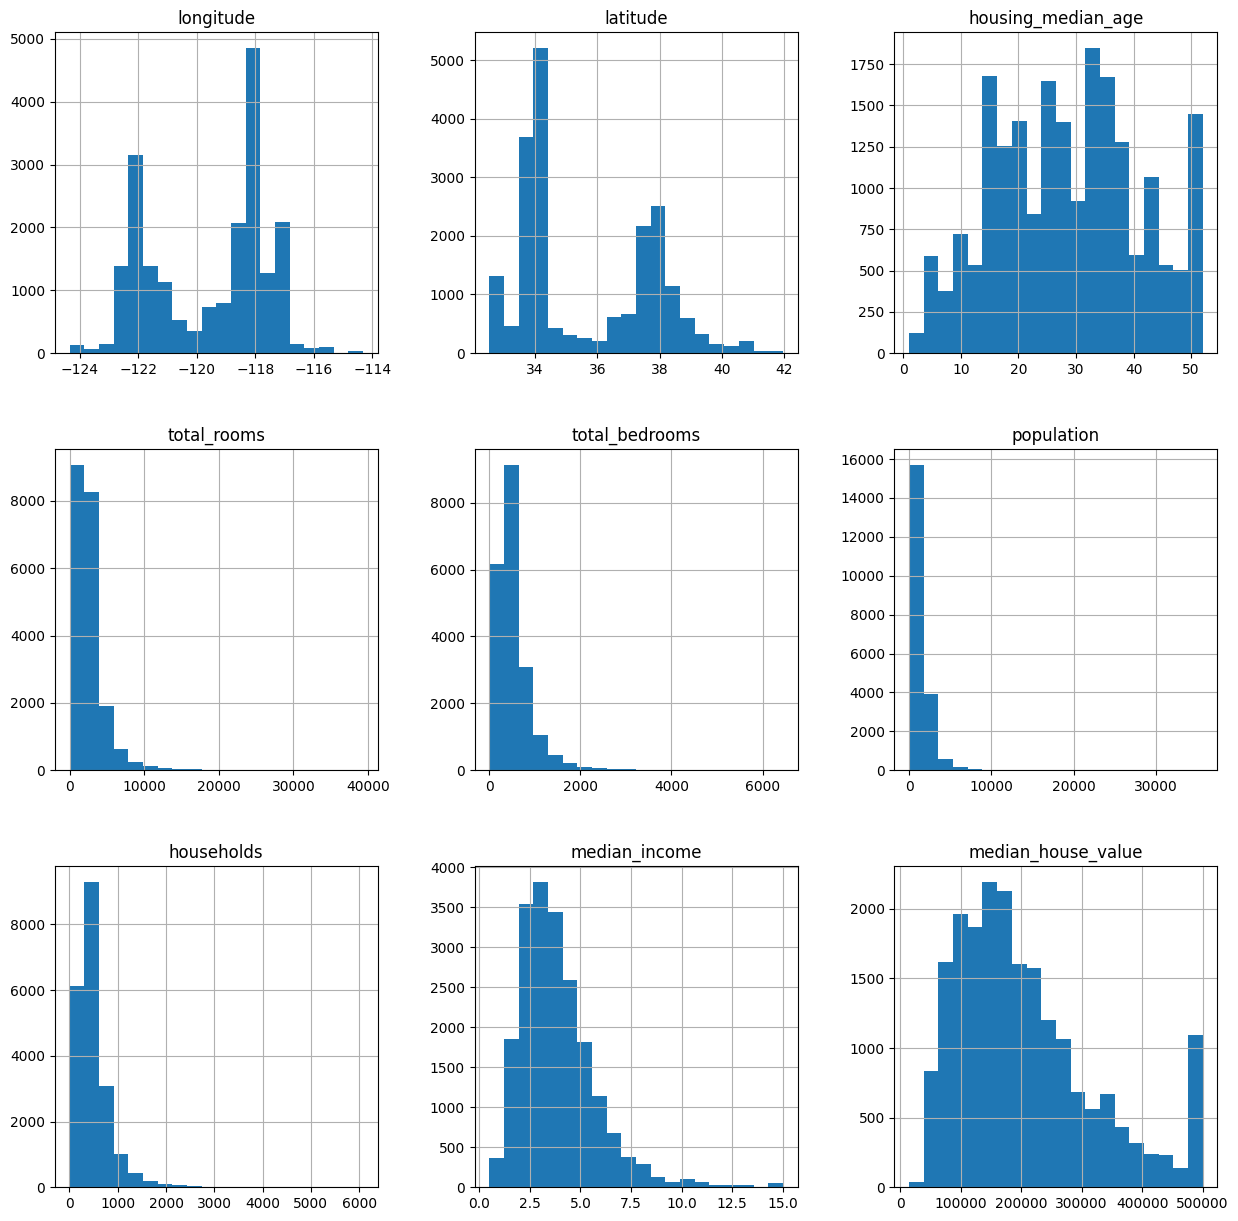

In [ ]:
housing.hist(bins=20, figsize=(15,15))
plt.show()

In [ ]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [ ]:
housing.iloc[200:399, :]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
200,-122.23,37.78,52.0,862.0,215.0,994.0,213.0,3.0257,80800.0,NEAR BAY
201,-122.22,37.78,50.0,1920.0,530.0,1525.0,477.0,1.4886,128800.0,NEAR BAY
202,-122.23,37.78,43.0,1420.0,472.0,1506.0,438.0,1.9338,112500.0,NEAR BAY
203,-122.23,37.78,52.0,986.0,258.0,1008.0,255.0,1.4844,119400.0,NEAR BAY
204,-122.23,37.78,44.0,2340.0,825.0,2813.0,751.0,1.6009,118100.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
396,-122.29,37.89,52.0,3171.0,698.0,1498.0,696.0,3.1795,218200.0,NEAR BAY
397,-122.29,37.88,50.0,1211.0,261.0,523.0,227.0,3.8672,216700.0,NEAR BAY
398,-122.29,37.89,52.0,979.0,175.0,374.0,153.0,5.1675,270600.0,NEAR BAY
399,-122.29,37.89,52.0,2269.0,380.0,1004.0,371.0,5.1696,261400.0,NEAR BAY


<Axes: xlabel='longitude', ylabel='latitude'>

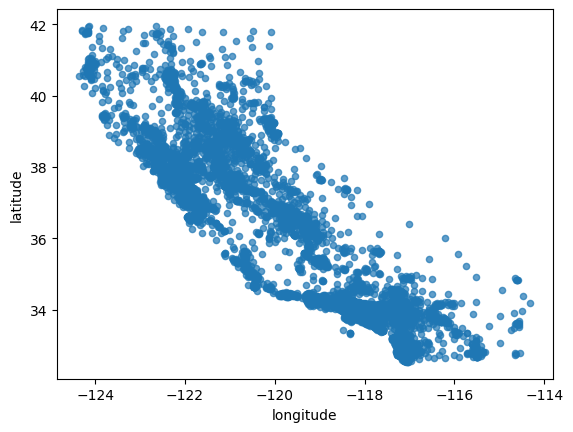

In [19]:
housing.plot.scatter(x="longitude", y="latitude", alpha=0.7)

<Axes: xlabel='longitude', ylabel='latitude'>

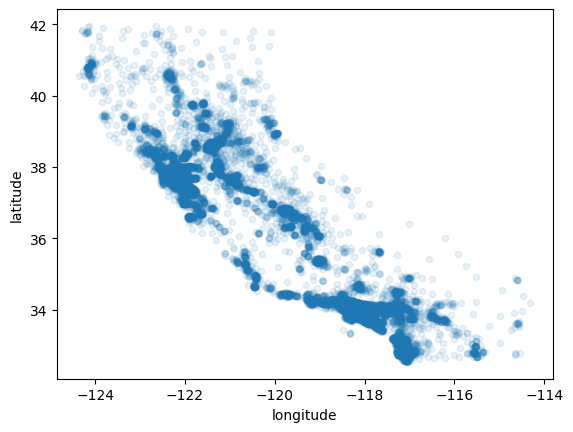

In [18]:
housing.plot.scatter(x="longitude", y="latitude", alpha=0.1)

In [ ]:
corr_matrix = housing.iloc[:, :-1].corr()

corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


### Grouping

พิจารณา Anscombe dataset ข้างล่างนี้

In [7]:
import seaborn as sns

df = sns.load_dataset('anscombe')

In [8]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [9]:
groups = df.groupby('dataset')

In [10]:
groups.get_group('I')

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [ ]:
groups.get_group('II')

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


In [ ]:
groups.get_group('III')

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


In [ ]:
groups.get_group('IV')

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91


In [25]:
groups.max('')

,x,y
dataset,,
I,14.0,10.84
II,14.0,9.26
III,14.0,12.74
IV,19.0,12.50


## Exercise 3

1. คำนวณค่า mean, standard deviation และ correlation matrix ของแต่ละกลุ่ม
2. สร้าง scatter plot ของแต่ละกลุ่มด้วย `groups.plot.scatter(...)`
3. จากข้อ 1 และข้อ 2 จงบอกว่าการศึกษาค่า summary statistics (mean, s.d., correlation) อย่างเดียวเพียงพอกับการศึกษาข้อมูลชุดหนึ่งหรือไม่ เพราะเหตุใด

Answer


In [38]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [36]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


In [37]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

,0
dataset,
I,"Axes(0.125,0.11;0.775x0.77)"
II,"Axes(0.125,0.11;0.775x0.77)"
III,"Axes(0.125,0.11;0.775x0.77)"
IV,"Axes(0.125,0.11;0.775x0.77)"


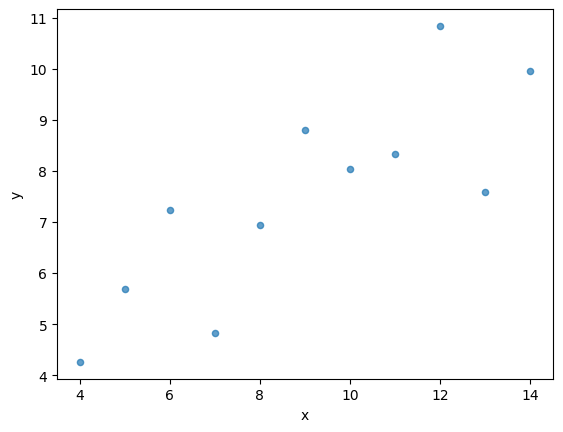

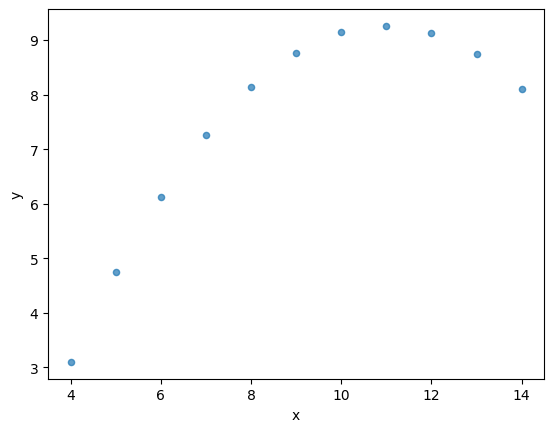

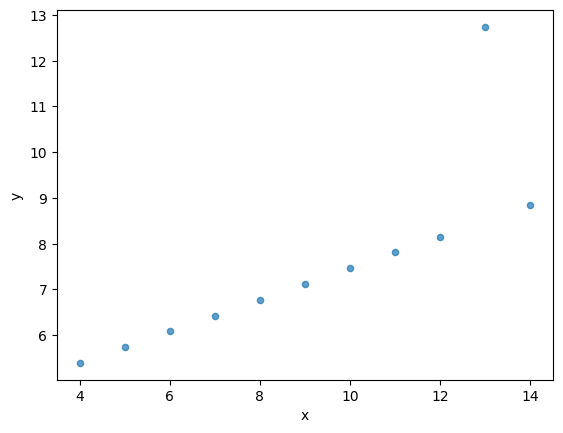

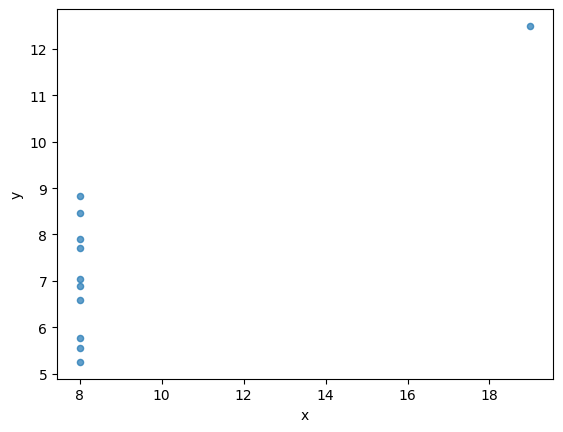

In [41]:
groups.plot.scatter(x="x", y="y", alpha = 0.7)

ไม่เพียงพอเนื่องจากค่า Summary Statistics ใกล้เคียงกันมาก และ Scatter Plots ที่มีความแตกต่างกัน I กราฟแสดงความสัมพันธ์เชิงเส้นตรง II คือ non-linear III กราฟแสดงความสัมพันธ์เชิงเส้นตรงเกือบสมบูรณ์แต่มีจุดข้อมูล Outlier IV ข้อมูลส่วนใหญ่มีค่า x เท่ากันและมีจุด Outlier
